<a href="https://colab.research.google.com/github/jgabrielsg/Analise-dos-Casos-de-Zika-no-Brasil-com-PySUS/blob/main/PySUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pysus
import pandas as pd
import matplotlib.pyplot as plt
import math

In [25]:
from pysus.online_data import SINAN

In [26]:
SINAN.list_diseases()

['Animais Peçonhentos',
 'Botulismo',
 'Cancer',
 'Chagas',
 'Chikungunya',
 'Colera',
 'Coqueluche',
 'Contact Communicable Disease',
 'Acidentes de Trabalho',
 'Dengue',
 'Difteria',
 'Esquistossomose',
 'Febre Amarela',
 'Febre Maculosa',
 'Febre Tifoide',
 'Hanseniase',
 'Hantavirose',
 'Hepatites Virais',
 'Intoxicação Exógena',
 'Leishmaniose Visceral',
 'Leptospirose',
 'Leishmaniose Tegumentar',
 'Malaria',
 'Meningite',
 'Peste',
 'Poliomielite',
 'Raiva Humana',
 'Sífilis Adquirida',
 'Sífilis Congênita',
 'Sífilis em Gestante',
 'Tétano Acidental',
 'Tétano Neonatal',
 'Tuberculose',
 'Violência Domestica',
 'Zika']

In [27]:
SINAN.get_available_years('Zika')

['2016', '2017', '2018', '2019', '2020', '2021']

In [28]:
df = SINAN.download('Zika', [2019, 2020])

In [ ]:
df19 = pd.read_parquet(df[0])
df19.to_csv('zika.csv', index=False)
df19.info()
print(df19.columns)

df19['DT_NOTIFIC'] = pd.to_datetime(df19['DT_NOTIFIC'])
     
df19.set_index('DT_NOTIFIC', inplace=True)
df19

In [ ]:
from pysus.preprocessing.decoders import decodifica_idade_SINAN
decodifica_idade_SINAN?
import numpy as np

print(df19.NU_IDADE_N)

df19['idade_anos'] = decodifica_idade_SINAN(df19.NU_IDADE_N, 'Y')

df19['idade_anos'] = np.floor(df19['idade_anos'])

df19[['NU_IDADE_N', 'idade_anos']]

Total de linhas: 30500


<Axes: xlabel='DT_NOTIFIC'>

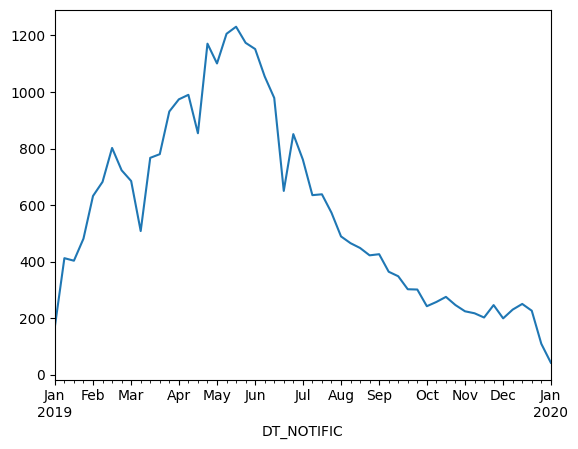

In [31]:
total_linhas = df19.shape[0]
print("Total de linhas:", total_linhas)

df19semanas = df19.resample('W').count()
  
df19semanas.CLASSI_FIN.plot()

In [32]:
dfpe = df19.groupby('ID_MUNICIP').count().sort_values('TP_NOT')
dfpe.sort_values(by="TP_NOT",ascending=False, inplace=True)
dfpe

,TP_NOT,ID_AGRAVO,CS_SUSPEIT,SEM_NOT,NU_ANO,SG_UF_NOT,ID_REGIONA,DT_SIN_PRI,SEM_PRI,NU_IDADE_N,...,COMUNINF,DOENCA_TRA,EVOLUCAO,DT_OBITO,DT_ENCERRA,CS_FLXRET,FLXRECEBI,TP_SISTEMA,TPUNINOT,idade_anos
ID_MUNICIP,,,,,,,,,,,,,,,,,,,,,
260720,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516,...,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516
330455,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225,...,1225,1225,1225,1225,1225,1225,1225,1225,1225,1225
172100,990,990,990,990,990,990,990,990,990,990,...,990,990,990,990,990,990,990,990,990,990
240810,736,736,736,736,736,736,736,736,736,736,...,736,736,736,736,736,736,736,736,736,736
354980,693,693,693,693,693,693,693,693,693,693,...,693,693,693,693,693,693,693,693,693,693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320100,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
110005,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
293170,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


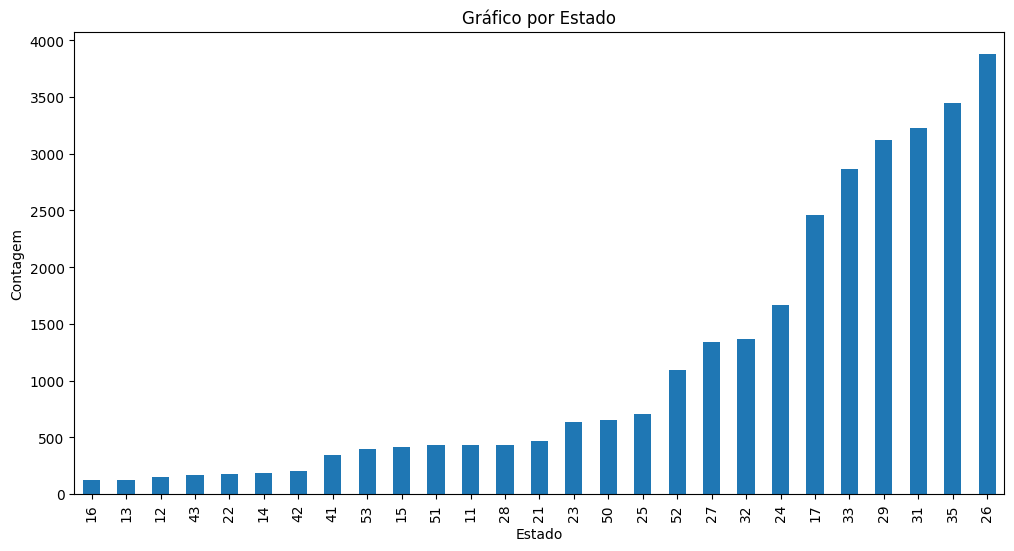

In [33]:
df_estados = df19.groupby('SG_UF').size()

df_estados = df_estados[df_estados >= 20]
df_estados = df_estados.sort_values()

plt.figure(figsize=(12, 6))

# Criar o gráfico por estado
df_estados.plot(kind='bar')

plt.xlabel('Estado')
plt.ylabel('Contagem')
plt.title('Gráfico por Estado')
plt.show()

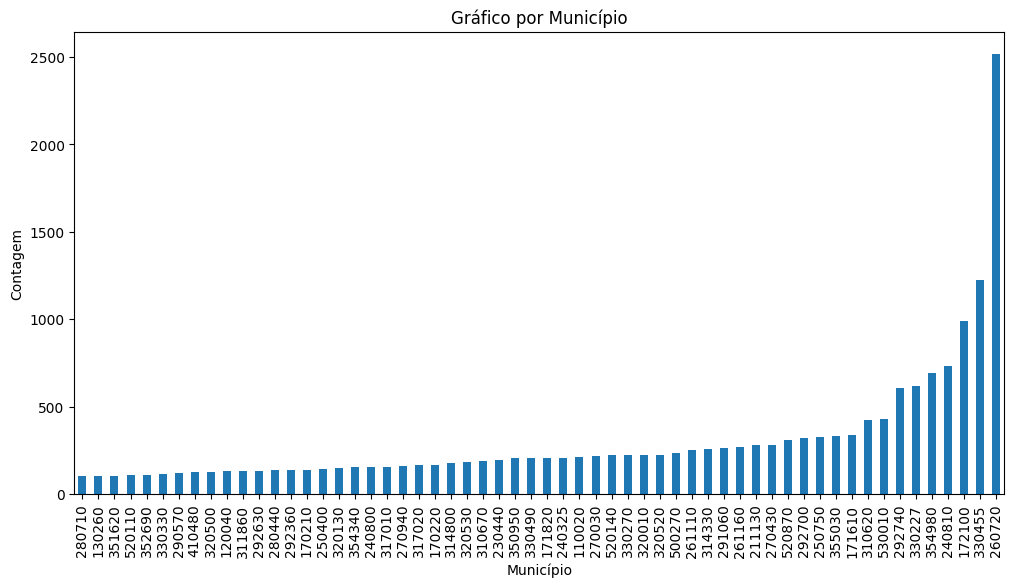

In [34]:
df_municipio = df19.groupby('ID_MUNICIP').size()

df_municipio = df_municipio[df_municipio >= 100]
df_municipio = df_municipio.sort_values()

plt.figure(figsize=(12, 6))

# Criar o gráfico por municipio
df_municipio.plot(kind='bar')


plt.xlabel('Município')
plt.ylabel('Contagem')
plt.title('Gráfico por Município')
plt.show()

<Axes: xlabel='DT_NOTIFIC'>

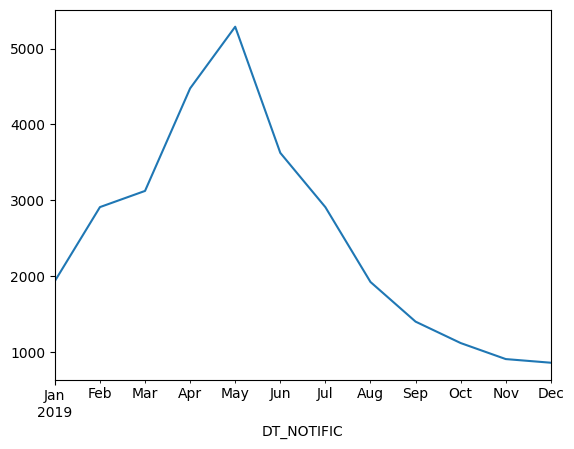

In [35]:
df19semanas = df19.resample('M').count()
  
df19semanas.CLASSI_FIN.plot()

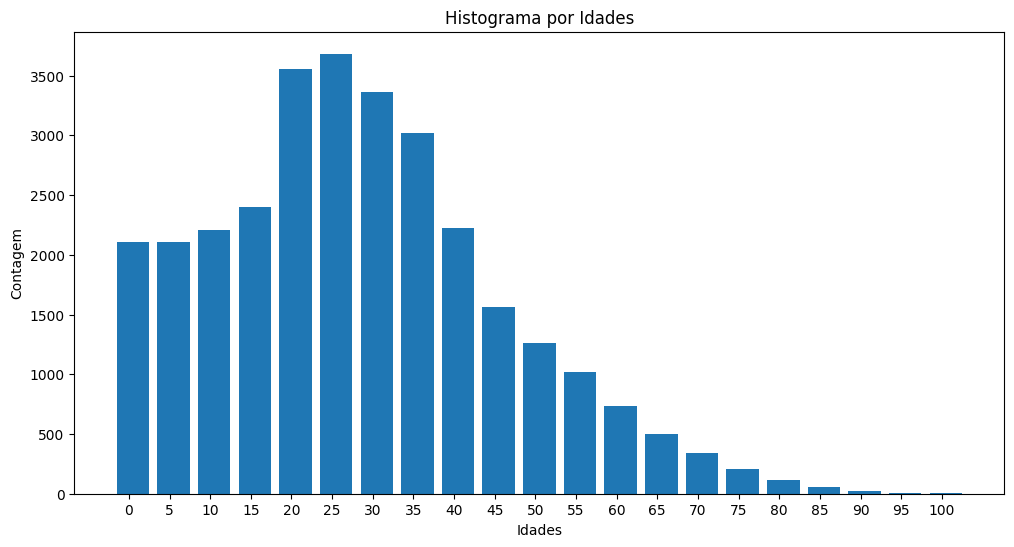

In [36]:
df_idades = df19.groupby('idade_anos').size()

df_idades = df_idades[df_idades >= 1]


plt.figure(figsize=(12, 6))

# Criar o histograma com intervalos de tamanho 5
plt.hist(df19['idade_anos'], bins=range(-2, 105, 5), rwidth=0.8)

plt.xlabel('Idades')
plt.ylabel('Contagem')
plt.title('Histograma por Idades')
plt.xticks(range(0, 105, 5))  # Definir os rótulos do eixo x de 0 a 100 com incremento de 5
plt.show()

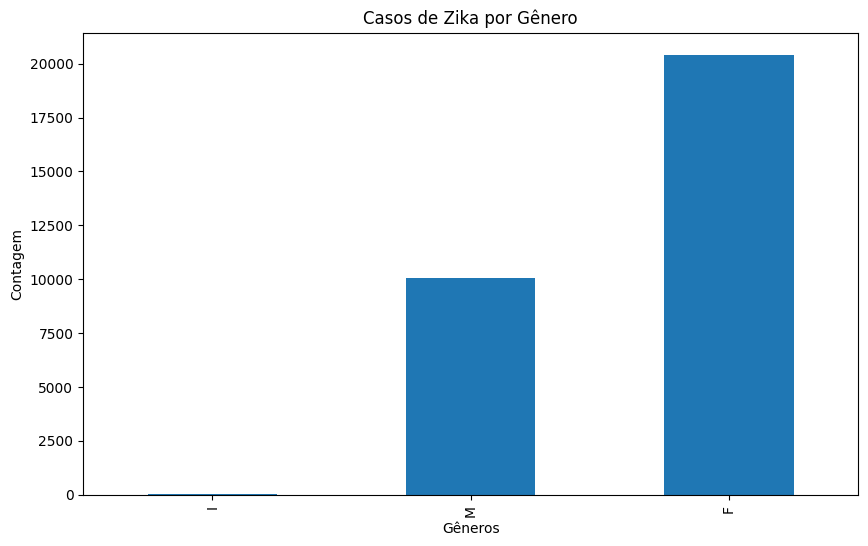

In [39]:
df_sexo = df19.groupby('CS_SEXO').size()

df_sexo = df_sexo[df_sexo >= 1]
df_sexo = df_sexo.sort_values()

plt.figure(figsize=(10, 6))

# Criar o histograma com intervalos de tamanho 5
df_sexo.plot(kind='bar')

plt.xlabel('Gêneros')
plt.ylabel('Contagem')
plt.title('Casos de Zika por Gênero')
plt.show()

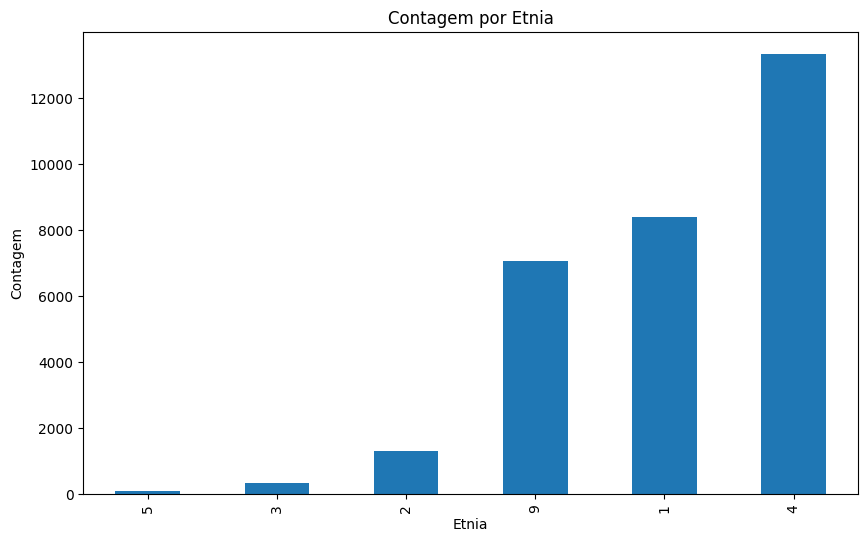

In [40]:
df_raca = df19.groupby('CS_RACA').size()

plt.figure(figsize=(10, 6))
df_raca = df_raca.sort_values()

df_raca.plot(kind='bar')

plt.xlabel('Etnia')
plt.ylabel('Contagem')
plt.title('Contagem por Etnia')
plt.show()